# lab-customer-analysis-round-3

In [186]:
# Load the DF
df = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')

In [187]:
def df_trans(df):
    """This function will perform a few transformations on the dataset"""
    
    #Drop column
    #df.drop(columns=['Unnamed: 0'], inplace=True)
    
    #Standarize Column Names - Lower the letters. 
    df.columns = df.columns.str.lower()
    
    #Print Numerical and Categorical Columns 
    numerical = df._get_numeric_data().columns
    cols = df.columns
    categorical = list(set(cols) - set(numerical))
    print(f'The numerical columns are: {numerical}')
    print(f'The categorical columns are: {categorical}')

    #Deal with NANs
    df['income'].fillna(df['income'].median(), inplace=True)
    df.fillna(0, inplace=True)

    #Transform the column df['effective to date'] to date time
    df['effective to date'] = pd.to_datetime(df['effective to date'])

    #Create column with month
    df['month'] = df['effective to date'].dt.month

    # Return the cleand DF with the first the quater of data

    return df




In [188]:
# Test the Function
df_trans(df)

The numerical columns are: Index(['customer lifetime value', 'income', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies',
       'total claim amount'],
      dtype='object')
The categorical columns are: ['effective to date', 'education', 'customer', 'vehicle size', 'policy type', 'gender', 'employmentstatus', 'renew offer type', 'policy', 'marital status', 'vehicle class', 'coverage', 'sales channel', 'state', 'response', 'location code']


,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,2
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,2
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,2
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,2


## EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:
* Show DataFrame info.
* Describe DataFrame.
* Show a plot of the total number of responses.
* Show a plot of the response rate by the sales channel.
* Show a plot of the response rate by the total claim amount.
* Show a plot of the response rate by income.

In [189]:
# import libraries
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from pandas.plotting import scatter_matrix
import seaborn as sns
from IPython.display import set_matplotlib_formats, HTML
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib import colors as mcolors
from pandas.plotting import register_matplotlib_converters
%matplotlib inline
%config InlineBackend.figure_format = 'png'

In [190]:
#Read CSV

df = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')

In [191]:
#Clean the file and deal with NAMS. Using the Function created in the previous excercice. 

df = df_trans(df)

The numerical columns are: Index(['customer lifetime value', 'income', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies',
       'total claim amount'],
      dtype='object')
The categorical columns are: ['effective to date', 'education', 'customer', 'vehicle size', 'policy type', 'gender', 'employmentstatus', 'renew offer type', 'policy', 'marital status', 'vehicle class', 'coverage', 'sales channel', 'state', 'response', 'location code']


In [192]:
#Display DataFrame
display(df)

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,2
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,2
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,2
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,2


## Show DataFrame info.

In [193]:
## Show DataFrame info.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer lifetime value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective to date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location code                  9134 non-null   object        
 11  marital status   

## Describe DataFrame.

In [194]:
#Describe Numerical
df.describe()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,1.463762
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.498712
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,1.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,1.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


In [195]:
#Describe all
df.describe(include='all')

C:\Users\ssai\AppData\Local\Temp\ipykernel_10284\1362201412.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,month
count,9134,9134,9134.000000,9134,9134,9134,9134,9134,9134,9134.000000,...,9134.000000,9134.000000,9134,9134,9134,9134,9134.000000,9134,9134,9134.000000
unique,9134,5,NaN,2,3,5,59,5,2,NaN,...,NaN,NaN,3,9,4,4,NaN,6,3,NaN
top,BU79786,California,NaN,No,Basic,Bachelor,2011-01-10 00:00:00,Employed,F,NaN,...,NaN,NaN,Personal Auto,Personal L3,Offer1,Agent,NaN,Four-Door Car,Medsize,NaN
freq,1,3150,NaN,7826,5568,2748,195,5698,4658,NaN,...,NaN,NaN,6788,3426,3752,3477,NaN,4621,6424,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2011-02-28 00:00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,8004.940475,NaN,NaN,NaN,NaN,NaN,NaN,37657.380009,...,0.384388,2.966170,NaN,NaN,NaN,NaN,434.088794,NaN,NaN,1.463762
std,NaN,NaN,6870.967608,NaN,NaN,NaN,NaN,NaN,NaN,30379.904734,...,0.910384,2.390182,NaN,NaN,NaN,NaN,290.500092,NaN,NaN,0.498712
min,NaN,NaN,1898.007675,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,1.000000,NaN,NaN,NaN,NaN,0.099007,NaN,NaN,1.000000
25%,NaN,NaN,3994.251794,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,1.000000,NaN,NaN,NaN,NaN,272.258244,NaN,NaN,1.000000


# Plots

In [196]:
#Define style for plotting

# default styles
def set_sns_format(width=14, height=8):
    sns.set_theme(palette='pastel', context='notebook',rc={'savefig.dpi':300})
    set_matplotlib_formats('retina')
    matplotlib.rcParams['figure.figsize'] = (width, height)
    return None

In [197]:
#Run Function to set style for following plots. 
set_sns_format(width=14, height=8)

C:\Users\ssai\AppData\Local\Temp\ipykernel_10284\2411945222.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [198]:
# Add labels to barplots and line plots
def add_value_labels(ax, typ, spacing=5):
    #This function add the labels in the bar and line plots
    #input the ax to add the labels, the type of plot
    
    space = spacing
    va = 'bottom'

    if typ == 'bar':
        for i in ax.patches:
            y_value = i.get_height()
            x_value = i.get_x() + i.get_width() / 2

            label = "{:.0f}".format(y_value)
            ax.annotate(label,(x_value, y_value), xytext=(0, space), 
                    textcoords="offset points", ha='center', va=va)     
    if typ == 'line':
        line = ax.lines[0]
        for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
            label = "{:.4f}".format(y_value)
            ax.annotate(label,(x_value, y_value), xytext=(0, space), 
                textcoords="offset points", ha='center', va=va)   

## Show a plot of the total number of responses.

In [199]:
df['response'].value_counts()

No     7826
Yes    1308
Name: response, dtype: int64

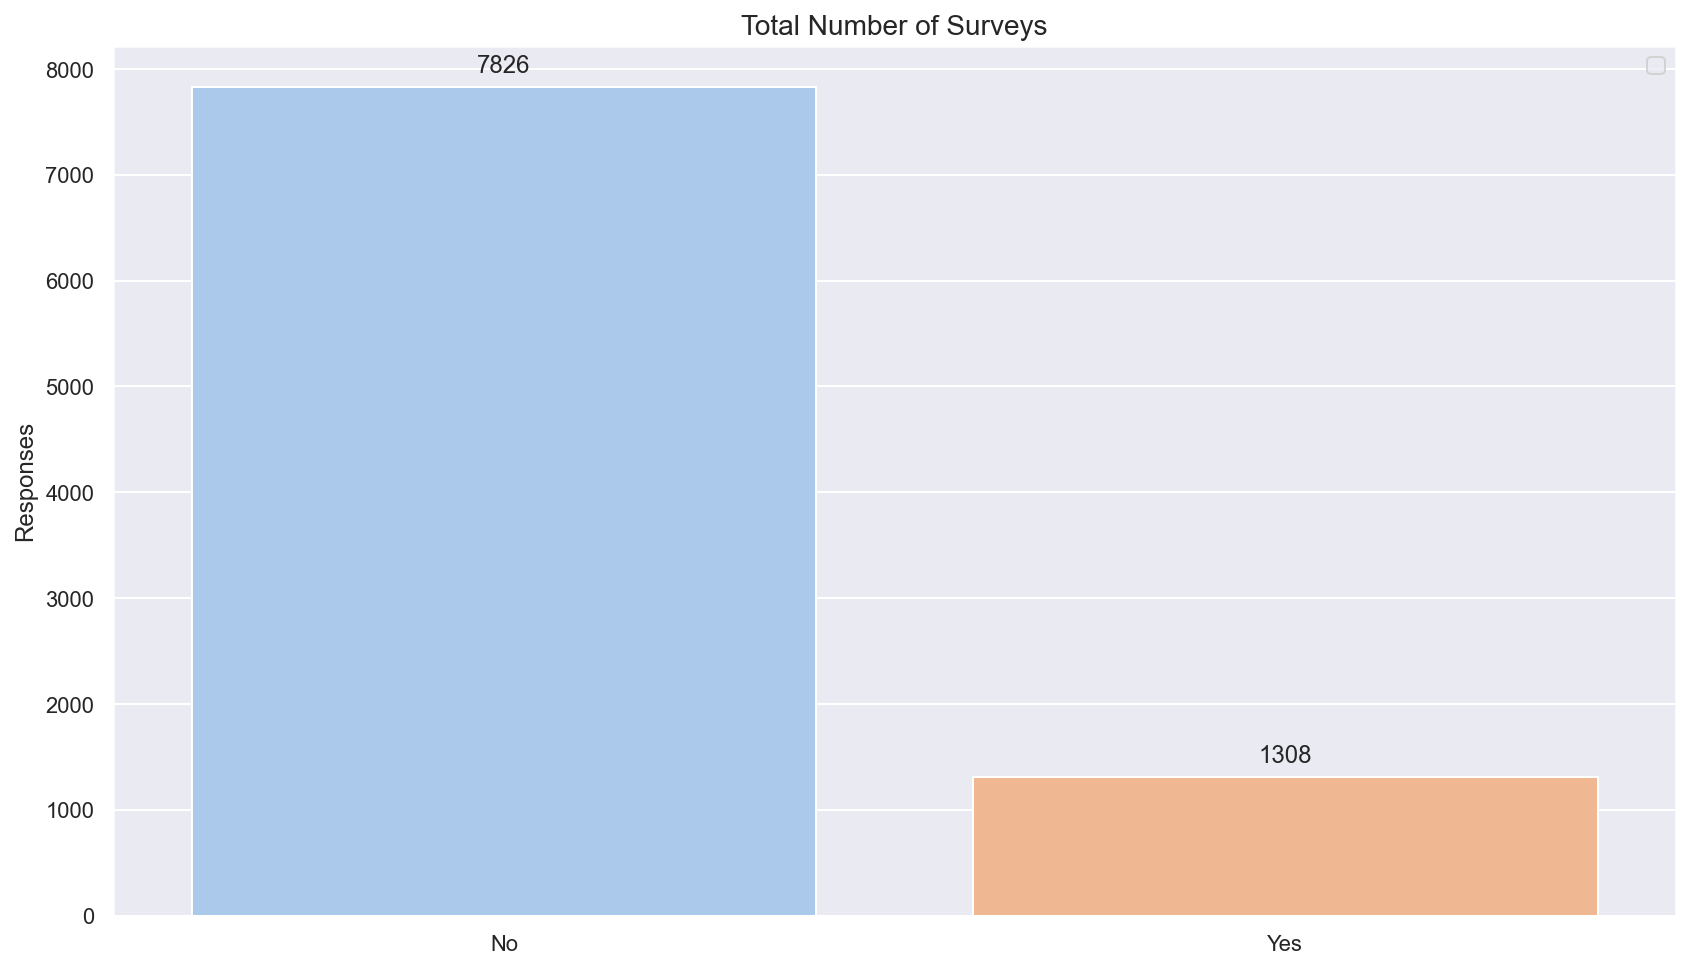

In [216]:
#Create data for being plotted
ax = sns.barplot(x=df['response'].value_counts().index, y=df['response'].value_counts())
#Use the get_legend_handles_Labels function to get the labels value of the bars
handles, labels = ax.get_legend_handles_labels()
#Apply labels to every bar
ax.legend(handles, labels)
#Name the Y axis
ax.set_ylabel('Responses')
#Set the xticks (values of the column reponses) in horizontal
plt.xticks(rotation='horizontal')
#Set the title 
plt.title('Total Number of Surveys', fontsize=14)
#apply fucntion to plot the bar labels
add_value_labels(ax, 'bar', spacing=5)
#Plot the barchart
plt.show()

# Show a plot of the response rate by the sales channel.

In [201]:
#Table to be plot
df.groupby(df['sales channel'])['response'].count()

sales channel
Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: response, dtype: int64

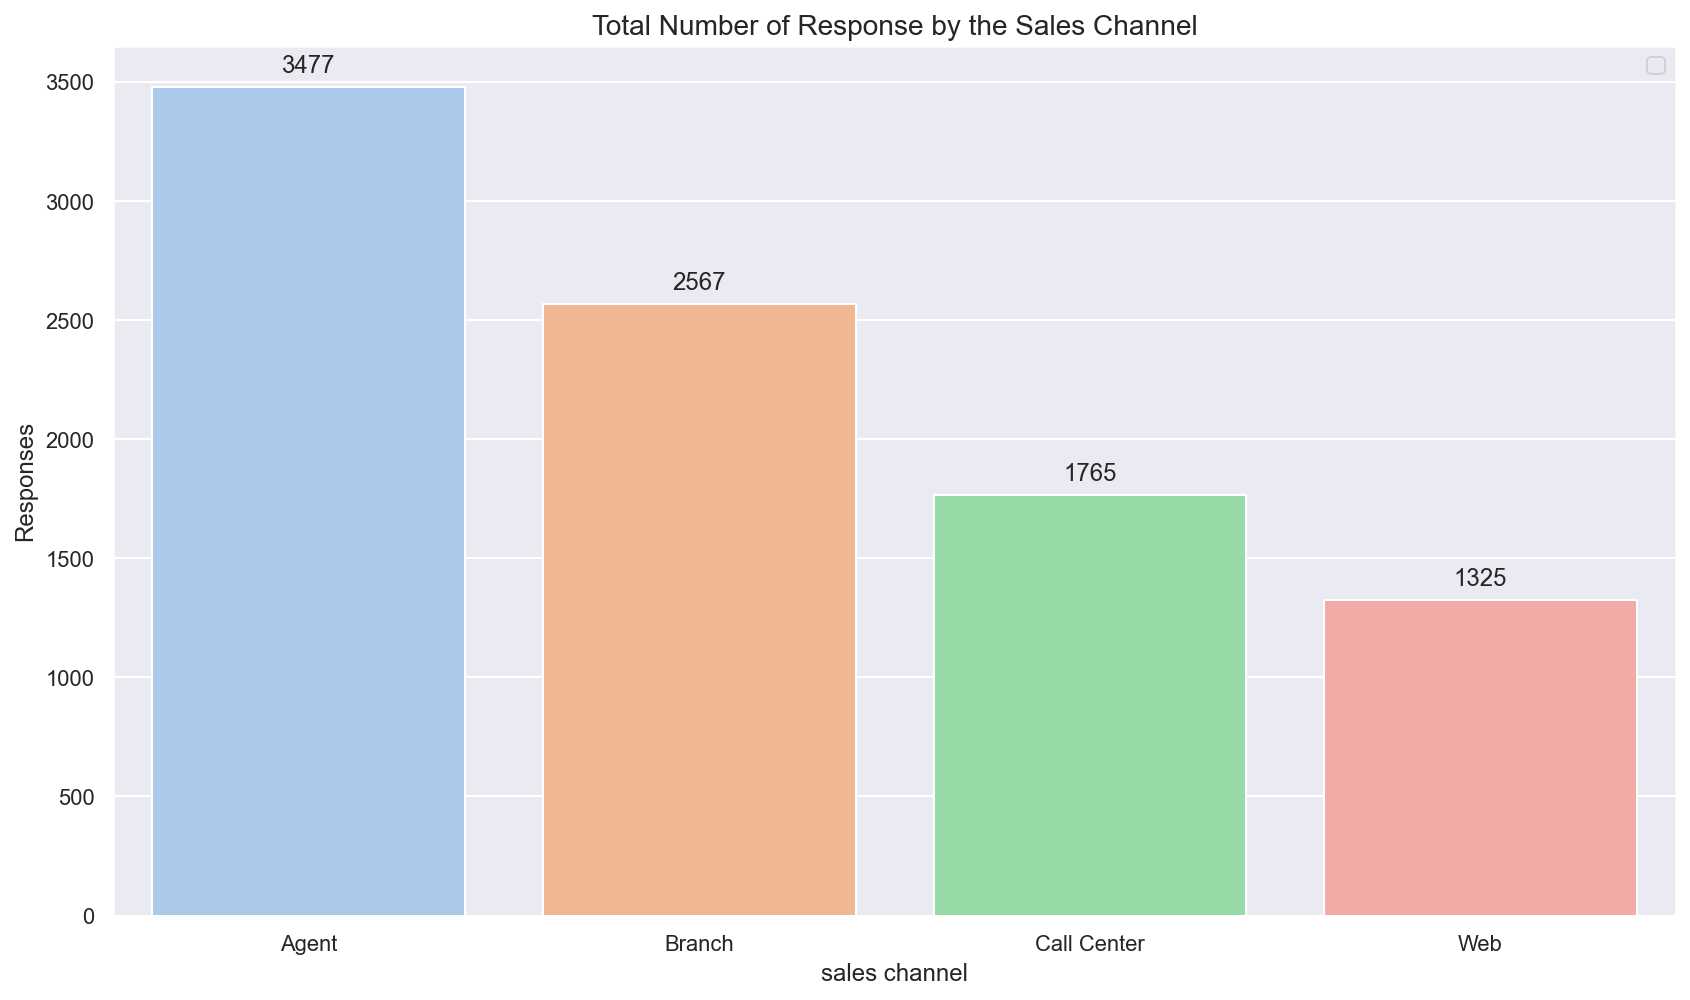

In [202]:
#BarPlot
#Create data for being plotted
ax = sns.barplot(x=df.groupby(df['sales channel'])['response'].count().index, y=df.groupby(df['sales channel'])['response'].count())
#Use the get_legend_handles_Labels function to get the labels value of the bars
handles, labels = ax.get_legend_handles_labels()
#Apply labels to every bar
ax.legend(handles, labels)
#Name the Y axis
ax.set_ylabel('Responses')
#Set the xticks (values of the column reponses) in horizontal
plt.xticks(rotation='horizontal')
#Set the title 
plt.title('Total Number of Response by the Sales Channel', fontsize=14)
#apply fucntion to plot the bar labels
add_value_labels(ax, 'bar', spacing=5)
#Plot the barchart
plt.show()

In [203]:
#Table to be plot
df.groupby(df['sales channel'])['response'].value_counts()

sales channel  response
Agent          No          2811
               Yes          666
Branch         No          2273
               Yes          294
Call Center    No          1573
               Yes          192
Web            No          1169
               Yes          156
Name: response, dtype: int64

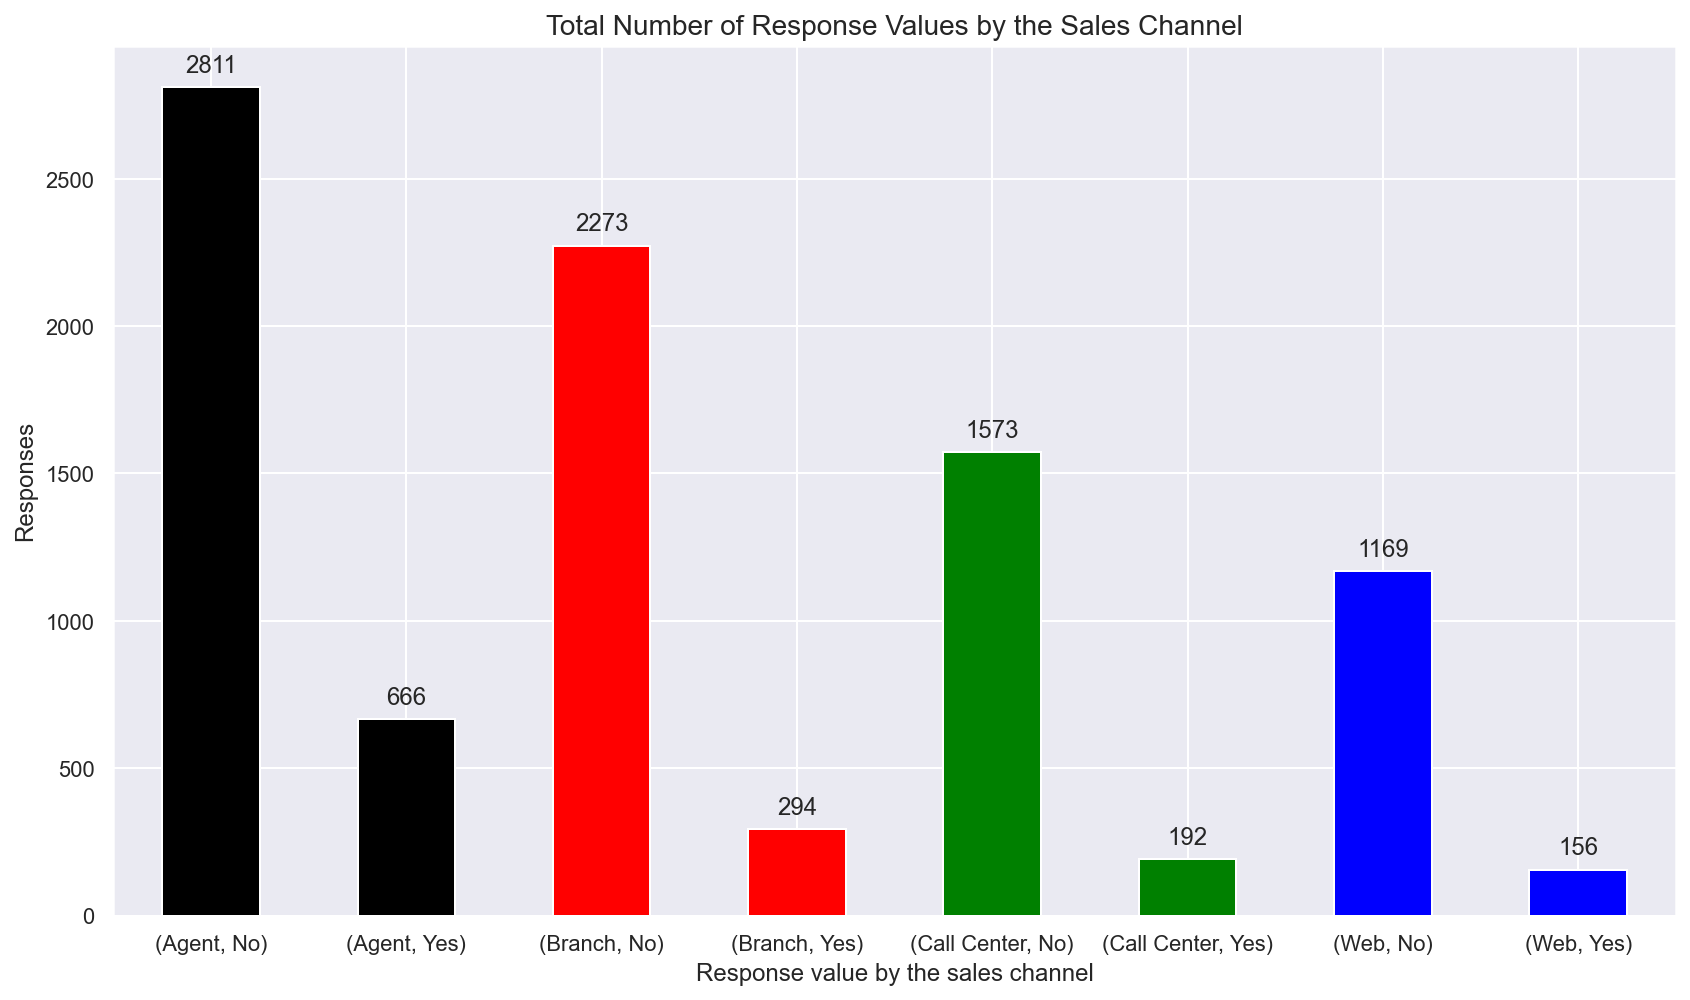

In [204]:
#BarPlot
#Response Rate Values by every Sales Channel. 
#Create data for being plotted
ax = df.groupby(df['sales channel'])['response'].value_counts().plot(kind='bar', color=['black', 'black', 'red','red','green', 'green', 'blue', 'blue'])
#Use the get_legend_handles_Labels function to get the labels value of the bars
handles, labels = ax.get_legend_handles_labels()
#Name the Y axis
ax.set_ylabel('Responses')
#Name the X axis
ax.set_xlabel('Response value by the sales channel')
#Set the xticks (values of the column reponses) in horizontal
plt.xticks(rotation='horizontal')
#Set the title 
plt.title('Total Number of Response Values by the Sales Channel', fontsize=14)
#apply fucntion to plot the bar labels
add_value_labels(ax, 'bar', spacing=5)
#Plot the barchart
plt.show()

## Show a plot of the response rate by the total claim amount.

In [205]:
#Table to be displayed
df.groupby(df['response'])['total claim amount'].sum()

response
No     3.381493e+06
Yes    5.834738e+05
Name: total claim amount, dtype: float64

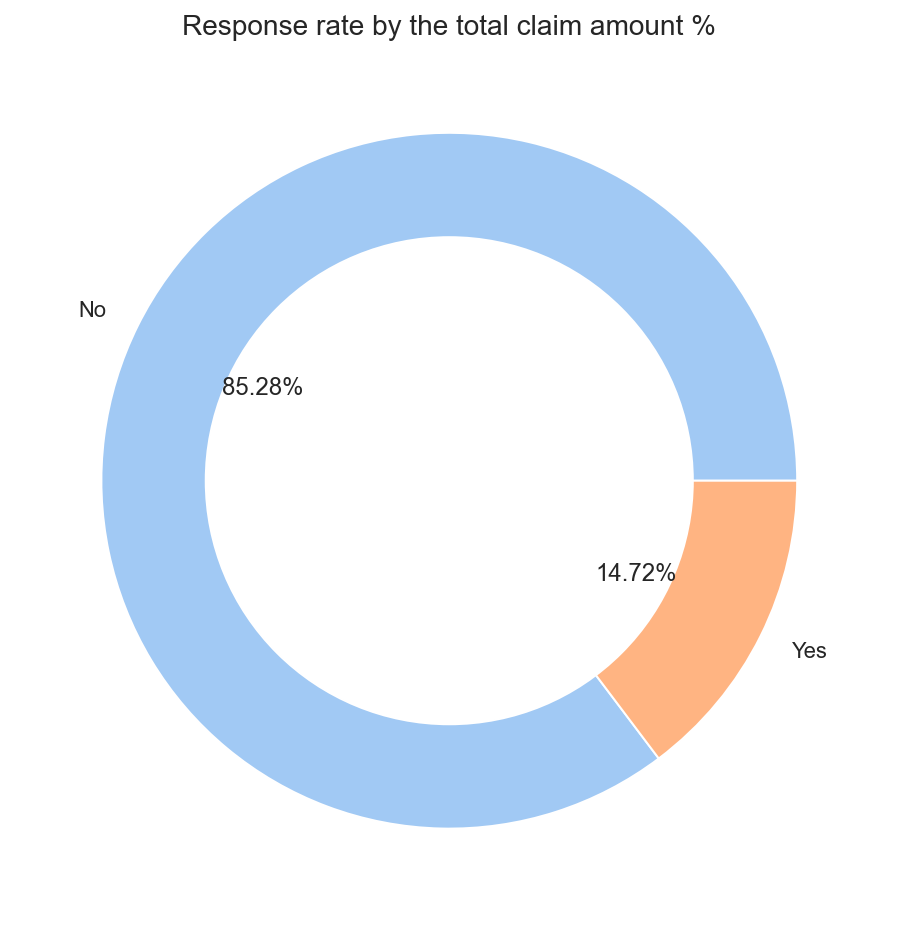

In [206]:
#Pie Chart
#Create Labels
names = ['No', 'Yes']
#Create Pie chart
plt.pie(df.groupby(df['response'])['total claim amount'].sum(), labels=names, autopct='%1.2f%%')
# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Response rate by the total claim amount %', fontsize=14)
plt.show()

##  Show a plot of the response rate by income.


In [207]:
#Replace NaN with Median
df['income'].fillna(df['income'].median(), inplace=True)

In [208]:
#Create bins 
bins = [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]
#Create bins with a new column
df['income_bins'] = pd.cut(df['income'], bins)


In [209]:
#Convert Bins to strs to be able to plot them.
df['income_bins'] = df['income_bins'].apply(lambda x : str(x))

In [210]:
#Table to be plotted
df.groupby(df['income_bins'])['response'].value_counts()

income_bins      response
(10000, 20000]   No           360
                 Yes          162
(20000, 30000]   No          1099
                 Yes          282
(30000, 40000]   No           767
                 Yes          126
(40000, 50000]   No           677
                 Yes           72
(50000, 60000]   No           671
                 Yes          120
(60000, 70000]   No           646
                 Yes          114
(70000, 80000]   No           577
                 Yes          120
(80000, 90000]   No           491
                 Yes           54
(90000, 100000]  No           419
                 Yes           60
Name: response, dtype: int64

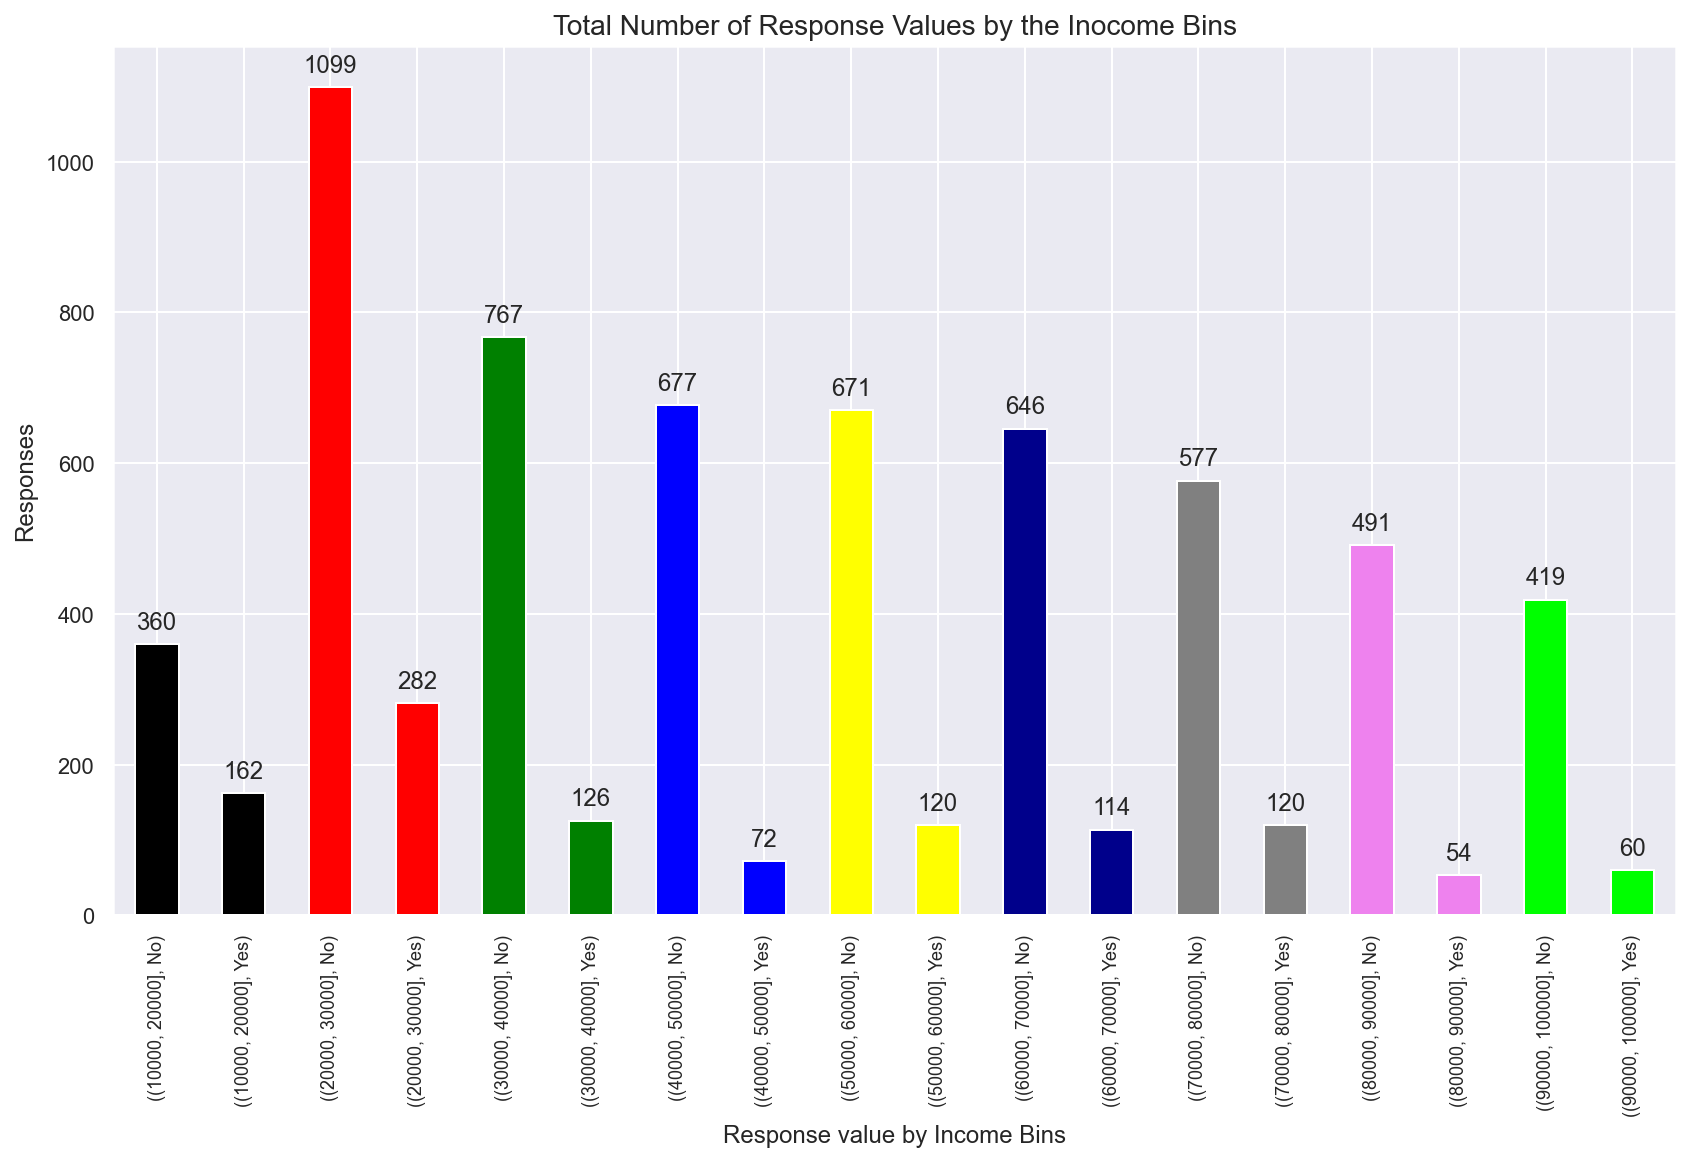

In [217]:
#BarPlot
#Response Rate Values by Income. 
#Create data for being plotted
ax = df.groupby(df['income_bins'])['response'].value_counts().plot(kind='bar', color=['black', 'black', 'red','red','green', 'green', 'blue', 'blue', 'yellow', 'yellow', 'darkblue', 'darkblue', 'grey', 'grey', 'violet', 'violet', 'lime', 'lime'])
#Use the get_legend_handles_Labels function to get the labels value of the bars
handles, labels = ax.get_legend_handles_labels()
#Name the Y axis
ax.set_ylabel('Responses')
#Name the X axis
ax.set_xlabel('Response value by Income Bins')
#Set the xticks (values of the column reponses) in horizontal
plt.xticks(rotation='90', fontsize=9)
#Set the title 
plt.title('Total Number of Response Values by the Inocome Bins', fontsize=14)
#apply fucntion to plot the bar labels
add_value_labels(ax, 'bar', spacing=5)
#Plot the barchart
plt.show()